In [1]:
import numpy as np
import os 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# here we will use grid method. 
# then it turns to a eigenvalue problem
# use householder algorithm + QR to solve eigenvalue 

In [3]:
# explore the potential function
def V(p, z):
    return -50*(1.0/(1.0+np.exp(-2)*np.cosh(np.sqrt(p*p+(z+7.5)*(z+7.5)))) + 
                1.0/(1.0+np.exp(-2)*np.cosh(np.sqrt(p*p+(z-7.5)*(z-7.5)))))

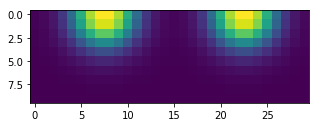

In [6]:
# potential function

f_test = []
for i in range(10):
    for j in range(-15, 15):
        f_test.append(V(i,j))
f_test=-np.reshape(np.array(f_test), (10,30))
fig = plt.figure(figsize=(5,5))
plt.imshow(f_test)
# plt.colorbar()
plt.show()
#so we choose p(0, 8), z(-15, 15), we should try even and uneven sampling 

In [13]:
# get matrix A for grid method 
def get_A(p_start, p_end, z_start, z_end, n_p, n_z, k2):
    dp = float((p_end-p_start)/n_p)
    dz = float((z_end- z_start)/n_z)
    print(dp, dz)
    S = n_p*n_z
    A = np.zeros((S,S))
    for i in range(S): 
        A[i,i]=2*(1/(dp*dp)+1/(dz*dz))+k2/np.square((int(i/n_z)+1.0)*dp)-(1/20.721246)*V((int(i/n_z)+1.0)*dp, -15.0+(int(i%n_z)+1.0)*dz)
        if i<S-1:
            A[i,i+1]=(-1.0-1.0/(2.0*(int(i/n_z)+1.0)))/(dp*dp)
        if i>0:
            A[i,i-1] = (-1.0+1.0/(2.0*(int(i/n_z)+1.0)))/(dp*dp)
        if i>=n_z:
            A[i, i-n_z]=-1/(dz*dz)
        if i<=S-1-n_z:
            A[i, i+n_z]=-1/(dz*dz)
    return 20.721246*A

In [9]:
#householder 
def householder(A0):
    A=A0
    N = A.shape[0]
    for i in range(N-2):
        a=0.0
        w = np.zeros(N)
        for j in range(i+1, N):
            a+=A[j, i]*A[j,i]
        a = np.sqrt(a)
        if A[i+1, i]>0:
            a=a*(-1)
        r = np.sqrt(0.5*(a*a-a*A[i+1, i]))
        for j in range(i+1):
            w[j]=0.0
        w[i+1]=(A[i+1, i]-a)/(2*r)
        for j in range(i+2, N):
            w[j]=A[j,i]/(2*r)
        P = np.eye(N)-2*np.outer(w,w)
        A = np.matmul(P, np.matmul(A, P))
    return A

In [10]:
QR_STEP = 1000
def norm_2(a):
    res = np.sqrt(np.sum(np.square(a)))
    return res

def QR_decomp(A):
    N = A.shape[0]
    Q = np.zeros(A.shape)
    AT = np.transpose(A)
    Q[0] = AT[0]/norm_2(AT[0])
    for i in range(1, N):
        Q[i] = A[i]
        for j in range(i): 
            Q[i] -= np.dot(AT[i], Q[j])*Q[j]
        Q[i] = Q[i]/norm_2(Q[i])
    return np.transpose(Q)

def QR(A0):
    A = A0
    for i in range(QR_STEP):
        #Q = QR_decomp(A)
        Q, R = np.linalg.qr(A)
#         print  np.matmul(np.transpose(Q), Q)
        A = np.matmul(np.transpose(Q), np.matmul(A, Q))
        #print 'A', A
    return A
        

In [15]:
#first we try 15*15 grid
A_test = get_A(0.0,8.0,-15.0,15.0,15,15,1)
# np.set_printoptions(threshold=np.nan)
print A_test, A_test.shape

(0.5333333333333333, 2.0)
[[ 231.68422738 -109.2721957     0.         ...    0.
     0.            0.        ]
 [ -36.42406523  243.89664942 -109.2721957  ...    0.
     0.            0.        ]
 [   0.          -36.42406523  266.04501828 ...    0.
     0.            0.        ]
 ...
 [   0.            0.            0.         ...  156.49957099
   -75.27640148    0.        ]
 [   0.            0.            0.         ...  -70.41985945
   156.42552425  -75.27640148]
 [   0.            0.            0.         ...    0.
   -70.41985945  156.3934198 ]] (225, 225)


In [17]:
# first we try 5*5 grid 
n_p = 5
n_z=5
A0 = get_A(0.0,8.0,-15.0,15.0,n_p,n_z,1)
# F0 = get_f(0.0,8.0,-15.0,15.0,n_p,n_z)
H= householder(A0)
A_diag = QR(H)
print A_diag

(1.6, 6.0)
[[ 6.00639064e+001  1.78027978e+000  2.16952783e+000  6.11883151e-001
   2.72979068e+000 -4.64996226e-001  5.42951030e-001 -1.30198395e+000
  -1.55067387e+000 -2.70172323e+000  2.64511267e+000 -2.06737199e+000
  -2.17745393e+000 -9.60487441e-001  1.76359825e+000  6.30035604e-001
   1.09101334e-002  9.13448930e-002 -1.44698312e-001  8.64933474e-002
   3.14260833e-002 -2.96557680e-002  2.37978101e-002  9.81658725e-003
   2.41582124e-003]
 [ 1.77292710e-014  5.80654773e+001  6.09190483e+000  4.98747716e+000
  -6.43724813e+000  1.91370703e-001  2.53026773e-001 -7.26091608e-001
  -9.19858524e-001 -1.56133961e+000  1.36061364e+000 -6.68544848e-001
   5.40631021e-001 -1.59883814e+000  2.30282562e+000  9.24241646e-001
  -7.58311696e-002  2.92094696e-001 -2.80505666e-001  1.51580322e-001
   5.59670819e-002 -5.09646032e-002  4.00582629e-002  1.61476211e-002
   3.90403968e-003]
 [-1.13916386e-161 -3.91534279e-132  4.28416088e+001 -2.09868191e+000
   1.87680146e+000 -8.90711288e-002 -9.

In [18]:
#we try 10*40 grid 
n_p = 10
n_z=40
A0 = get_A(0.0,8.0,-15.0,15.0,n_p,n_z,1)
# F0 = get_f(0.0,8.0,-15.0,15.0,n_p,n_z)
H= householder(A0)
A_diag = QR(H)
for i in range(n_p*n_z):
    print A_diag[i,i]

(0.8, 0.75)
301.74910847525064
301.7490571329679
289.461211763444
289.6002254036457
284.39816832839455
283.91735971049246
279.2598085460725
279.20908698181165
277.7525912010123
277.78000701470654
272.8996517439175
273.01135013609553
271.9727592165923
272.0593079477808
269.8048571277008
269.68260702059024
265.32177687532345
265.4374399043286
265.74827349536054
265.7636053594509
264.9808532291981
264.9629945137761
259.9886683125891
260.5650667096571
259.42344745326983
256.7661233295967
257.08483216426686
259.8859808178464
256.2164095454724
256.7497636148822
255.0122474419012
254.36874306559812
250.85097059919477
251.03628935714596
247.32254819831294
247.24624378691993
248.76454354355388
248.57481818119774
249.33938259539525
249.06147022047364
243.09618058233738
243.0975078778747
242.59583023136986
242.55792531683952
242.041855462762
242.4544477558743
237.51812762180867
237.60893912087133
239.28354328672745
240.48165122794308
235.1966094170605
235.9394807878076
234.11493109685452
234.4571

In [19]:
#we try 20*20 grid 
n_p = 20
n_z=20
A0 = get_A(0.0,8.0,-15.0,15.0,n_p,n_z,1)
# F0 = get_f(0.0,8.0,-15.0,15.0,n_p,n_z)
H= householder(A0)
A_diag = QR(H)
for i in range(n_p*n_z):
    print A_diag[i,i]

(0.4, 1.5)
672.8215641046974
665.7250066657175
641.7860698526594
647.8556997771268
591.3856359704619
611.6317258329083
584.9390962308383
587.3047711885398
573.1736308329756
568.7559881002687
561.6455569943704
563.9376326204728
550.6811101533287
564.0722500628364
536.9089474427867
551.1158918495893
557.2749633823563
557.2320389806753
554.7725811751491
553.1611773078662
551.4296196318776
552.2899211076477
550.6700842208577
549.6182392575105
547.9969268200281
546.4067126640878
546.2657257012805
541.0417379728357
544.2657382339431
545.7809938064155
541.3240328806365
543.1734491254912
538.7443470650305
536.9095974924634
535.9814357088206
538.8022071410691
535.6071532326438
535.4252177189959
532.2403638744397
531.9362523611786
533.4303073737273
530.9260177584771
530.8154239128609
528.9540571158603
529.6779237191593
527.0113873411962
529.454471291197
527.2317734151223
526.3557485672035
525.768824816913
527.1445405768627
508.8937932536896
519.1099311611534
524.0002425777452
524.7833925609345
5